In [1]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
import xarray as xr
import os, glob
import Nio
from scipy.io import loadmat
import pandas as pd 
import datetime

/Users/nicolasdeassisbose/anaconda3/lib/python3.6/site-packages/dask/config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
# Open WIND GFS data

%cd /Users/nicolasdeassisbose/Desktop/codigo_artigo/ww3_parameters

path_hs = sorted(glob.glob(os.path.join('multi_1.glo_30m.wind*.grb2')))

pr1_wind = xr.open_dataset(path_hs[0], engine = 'pynio')
pr2_wind = xr.open_dataset(path_hs[1], engine = 'pynio')
#pr3_hs = xr.open_dataset(path_hs[2], engine = 'pynio')
#pr4_hs = xr.open_dataset(path_hs[3], engine = 'pynio')
#pr5_hs = xr.open_dataset(path_hs[4], engine = 'pynio')
#pr6_hs = xr.open_dataset(path_hs[5], engine = 'pynio')
#pr7_hs = xr.open_dataset(path_hs[6], engine = 'pynio')
#pr8_hs = xr.open_dataset(path_hs[7], engine = 'pynio')
#pr9_hs = xr.open_dataset(path_hs[8], engine = 'pynio')
#pr10_hs = xr.open_dataset(path_hs[9], engine = 'pynio')
#pr11_hs = xr.open_dataset(path_hs[10], engine = 'pynio')
#pr12_hs = xr.open_dataset(path_hs[11], engine = 'pynio')

/Users/nicolasdeassisbose/Desktop/codigo_artigo/ww3_parameters


In [58]:
# GFS wind coordinate

lat_pr1 = pr1_wind['lat_0'].values
lon_pr1 = pr1_wind['lon_0'].values-360

In [86]:
# SWAN GRID format

lat_i, = np.where(lat_pr1 == -22)
lat_f, = np.where(lat_pr1 == -40)

lon_i, = np.where(lon_pr1 == -65)
lon_f, = np.where(lon_pr1 == -44)

In [87]:
## Regular Grid coordinate for swan wave model

lon = lon_pr1[int(lon_i):int(lon_f)]
lat = lat_pr1[int(lat_i):int(lat_f)]

In [92]:
# Extract Wind data

u1 = pr1_wind['UGRD_P0_L1_GLL0'].values
v1 = pr1_wind['VGRD_P0_L1_GLL0'].values
U1 = u1[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
V1 = v1[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]


u2 = pr2_wind['UGRD_P0_L1_GLL0'].values
v2 = pr2_wind['VGRD_P0_L1_GLL0'].values
U2 = u2[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
V2 = v2[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u3 = pr3_wind['UGRD_P0_L1_GLL0'].values
#v3 = pr3_wind['VGRD_P0_L1_GLL0'].values
#U3 = u3[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V3 = v3[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u4 = pr4_wind['UGRD_P0_L1_GLL0'].values
#v4 = pr4_wind['VGRD_P0_L1_GLL0'].values
#U4 = u4[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V4 = v4[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u5 = pr5_wind['UGRD_P0_L1_GLL0'].values
#v5 = pr5_wind['VGRD_P0_L1_GLL0'].values
#U5 = u5[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V5 = v5[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u6 = pr6_wind['UGRD_P0_L1_GLL0'].values
#v6 = pr6_wind['VGRD_P0_L1_GLL0'].values
#U6 = u6[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V6 = v6[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u7 = pr7_wind['UGRD_P0_L1_GLL0'].values
#v7 = pr7_wind['VGRD_P0_L1_GLL0'].values
#U7 = u7[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V7 = v7[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u8 = pr8_wind['UGRD_P0_L1_GLL0'].values
#v8 = pr8_wind['VGRD_P0_L1_GLL0'].values
#U8 = u8[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V8 = v8[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u9 = pr9_wind['UGRD_P0_L1_GLL0'].values
#v9 = pr9_wind['VGRD_P0_L1_GLL0'].values
#U9 = u9[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V9 = v9[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u10 = pr10_wind['UGRD_P0_L1_GLL0'].values
#v10 = pr10_wind['VGRD_P0_L1_GLL0'].values
#U10 = u10[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V10 = v10[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u11 = pr11_wind['UGRD_P0_L1_GLL0'].values
#v11 = pr11_wind['VGRD_P0_L1_GLL0'].values
#U11 = u11[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V11 = v11[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]

#u12 = pr12_wind['UGRD_P0_L1_GLL0'].values
#v12 = pr12_wind['VGRD_P0_L1_GLL0'].values
#U12 = u12[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]
#V12 = v12[:,int(lat_i):int(lat_f),int(lon_i):int(lon_f)]


In [94]:
# Time period 

time_0 = '20150101' 
time_end = '20150228 21:00:00'
time = pd.date_range(time_0, time_end, freq='3H')
time_forecast = time.format(formatter=lambda x: x.strftime('%Y%m%d.%H%M'))

In [100]:
## Concatenate WIND data

U_grid = np.concatenate((U1,V2))
V_grid = np.concatenate((V1,V2))

In [101]:
## Write WIND input SWAN in CSV

time_swan = 'wind_noaa_2015.wnd'

file = open(time_swan,'w')
for t in range(len(time_forecast)):
    file.write(time_forecast[t])
    file.write('''
''')
    file.close()
    file = open(time_swan,'a+')
    file.write(pd.DataFrame(U_grid[t][:][:]).to_csv(index=False, header=False, na_rep=0,float_format='%7.3f'))
    file.write(pd.DataFrame(V_grid[t][:][:]).to_csv(index=False, header=False, na_rep=0, float_format='%7.3f'))
    
file = open(time_swan,"rt")
data = file.read()
data = data.replace(',',' ')
file.close()
file = open(time_swan,"wt")
file.write(data)
file.close()

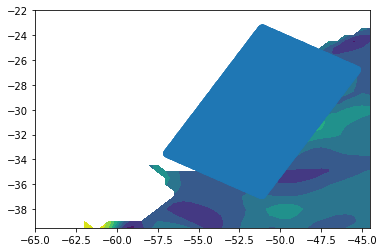

In [103]:
plt.contourf(lon,lat,U[0])
x = loadmat('grid_controle.mat')
lat_swan = x['Yp']
lon_swan = x['Xp']
plt.scatter(lon_swan,lat_swan)